# Dimensionality Reduction

real world datasets typically have high dimensions but their true dimensionality often much lower. but so what? what is the problem to have high dimensionality?<br>
Machine learning methods are statistical by nature, in most methods we count observation in various regions of some spaces (use counts to construct the predictor), so as dimensionality grows, our density of observations vecome lower and lower (fewer observation per region) and we need high number of observation in statistics. also by having high dimensional dataset we will have complex and large dataset, so it will be good to have data with low dimension. there are several way to deal with high dimensionality:<br>
   * Use domain knowledge: feature engineering
   * Make assumption about dimensions: like independence, smoothnessm symmetry , etc.
   * Reduce the dimensionality of the data: create a new dataset using our previous dataset, with lower dimension.<br>

we talked about feature engineering in preprocessing section, which is using domain knowlegde to create smart features that represent our data very well. also various models have their assumption about data, so when we use them we have to be aware of them. what we going to do, is to talk about dimensionality reduction methods.<br>
in **Dimensionality Reduction** technique, the goal is to preserve as much data as possible but in lower dimension and also in performance persespective we want to:<br>
   * Reduce model complexity
   * Less storage for model and dataset
   * Enhance the computational efficiency (faster training)
   * Reduce generalization error introduced due to noise by irrelevant features
   * **Maybe** improve our model accuracy<br>

in general we can divide dimensionality reduction technique in two main group:<br>
   1. Feature Selection
   2. Feature Extraction<br>

let's talk about them.

## Feature Selection

Simply speaking, **Feature Selection** is about selecting a subset of features out of the original features. so we just select some of our features, but which one? several methods can help us to choose between features, and also we can divide these methods into various forms, why divide them? well this way we can find the difference between methods more easily and also I like it this way :)).<br>
so According to the dataset, feature selection can be divided into:
   * Supervised
       * using **univariate statistics**
       * **model-based** feature selection
   * Unsupervised
       * **Variance-based**: remove features with zero or almost zero variance (if we scaling our data there is no such thing as small variance)
       * **Covariance-based**: remove correlated features.
   * Semi-suppervised<br>

And according to their relationship with learning models can be classified into:
   * **Filter Methods**: these methods are generally used as preprocessing steps. the selection of features is independent of any ML algorithms. instead, features are selected on basis of their scores in various statistical tests for their correlation. for example using **Pearson's Correlation**, **Analysis of Variance (ANOVA)**, **P-Value**, and **Chi-Square**.
   * **Wrapper Methods**: in wrapper methods, we try to use a subset of features and train the model using them. then based on inferences that we draw from the previous model, we decide to add or remove features from our subsets. these methods are usually computationally expensive because they are searched over all possible subsets. some common examples of wrapper methods are **Forward Selection**, **Backward Elimination**, and **Recursive Feature Elimination**
   * **Embedded Methods**: here somehow we combine the qualities of the filter and wrapper method. here our algorithm has a mechanism that somehow selects features in the learning process, like, **Lasso**, **Ridge**, and **Regularized Trees**.<br>

**NOTE**: Some of the differences between the Filter and wrapper method:
   * Filter methods measure the relevance of the features by their correlation with the dependent variable while wrapper methods measure the usefulness of a subset of features by actually training a model on it.
   * Filter methods are much faster than wrapper methods as they don't involve training the models, and as we said before wrapper methods are computationally expensive.
   * Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross-validation and accuracy of our model.
   * Filter methods might fail to find the best subset of features on many occasions, but wrapper methods can always provide the best subset of features.
   * Using the subset of features from wrapper methods makes the model more prone to overfitting compared to using a subset of features from the filter methods.

### Implementing some of feature selection methods

**Filter Method**

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [4]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train) # Scaling our data
X_test = scale.transform(X_test)

In [5]:
F, P = f_classif(X_train,y_train)

pick P values with smallest value or we can use `SelectKBest`

In [6]:
select = SelectKBest(score_func=f_classif,k=10) #pick 10 of the features with highest score
select.fit(X_train,y_train)
X_select = select.transform(X_train)
X_train.shape, X_select.shape

((455, 30), (455, 10))

**Wrapper Method**<br>
it is implemented in `mlxtend` library so first you have to install it.

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()
sfs = SequentialFeatureSelector(lr,k_features=10,forward=True)
X_sfs = sfs.fit(X_train,y_train)

In [9]:
X_sfs.subsets_

{1: {'feature_idx': (22,),
  'cv_scores': array([0.91208791, 0.93406593, 0.87912088, 0.93406593, 0.92307692]),
  'avg_score': 0.9164835164835166,
  'feature_names': ('22',)},
 2: {'feature_idx': (22, 24),
  'cv_scores': array([0.96703297, 0.98901099, 0.93406593, 0.94505495, 0.95604396]),
  'avg_score': 0.9582417582417584,
  'feature_names': ('22', '24')},
 3: {'feature_idx': (1, 22, 24),
  'cv_scores': array([0.98901099, 0.97802198, 0.95604396, 0.96703297, 0.98901099]),
  'avg_score': 0.9758241758241759,
  'feature_names': ('1', '22', '24')},
 4: {'feature_idx': (1, 8, 22, 24),
  'cv_scores': array([0.98901099, 1.        , 0.96703297, 0.96703297, 0.98901099]),
  'avg_score': 0.9824175824175825,
  'feature_names': ('1', '8', '22', '24')},
 5: {'feature_idx': (1, 8, 20, 22, 24),
  'cv_scores': array([0.98901099, 1.        , 0.96703297, 0.97802198, 0.98901099]),
  'avg_score': 0.9846153846153847,
  'feature_names': ('1', '8', '20', '22', '24')},
 6: {'feature_idx': (1, 6, 8, 20, 22, 24),


**Embedded Method**

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(penalty='l1',solver='liblinear') #l1 loss (lasso)

In [12]:
select = SelectFromModel(lr,threshold=0.0001) #will eleminate features with weight less than our threshold
select.fit(X_train,y_train)
X_select = select.transform(X_train)
X_select.shape

(455, 16)

## Feature Extraction

Feature extraction is about extracting information from the original features set to create new features subspace. the primary idea behind feature extraction is to compress the data with the goal of maintaining most of the relavant information. we can divide feature extraction techniques into two main approach:
   * Projection
       * Principle Component Analysis (**PCA**): Linear unsuppervised dimensionality reduction technique.
       * Linear Discriminant Analysis (**LDA**): Linear supervised dimensionality reduction technique.
       * Kernel Principal Component Analysis (**KPCA**): Non-Linear dimensionality reduction technique.<br>
   * Manifold Learning
       * Localy Linear Embedding (**LLE**)
       * t-distributed Stochastic Neighbor Embedding (**t-SNE**): Non-Linear dimensionality reduction technique, typically used to visualize hight dimensional datasets.<br>

**NOTE**: **Difference between feature extraction and feature selection**<br>
the key difference is that the original features are maintained in the case of feature selection techniques, in contrast in feature extraction, data transforming into new feature space, so feature selection are used when model explainability is a key requirement.<br>
**NOTE**: **Another definition for feature extraction** <br>
use all the original features and combine them in some way (e.g linear or non-linear combination) to form a new feature set.<br>

${Z_{1}}. . . {Z_{n}} = {f}({X_{1}} . . . {X_{n}})$

for various methods ${f}$ can be different.

now lets talk about some of these methods in details.

### PCA

Principal Component Analysis (PCA), is the most commonly used feature extraction method. it defines a set of principal components (same size as our feature size) and uses these components (as a new coordinate system) to project our dataset. but these principal components have a special specifications.<br>
for the first principal component, PCA finds the direction with **greatest variance** around it. then find the second direction perpendicular to the first one, with the greatest variance for the rest of the data and so on. so at the end we have independent directions that are sorted by their value of variance. so after we define these new directions we project our dataset to this new coordinate system. in our new dataset, we don't know which new features represent what property but all we know is that they are sorted by greatest variance to lowest variance. so in the end, we can decide how much variance we want to keep and delete some of the features.<br>
but why the greatest variance? by choosing the direction with the greatest variance we somehow preserve distances between our data points (means that if two points in our original dataset have a big gap between them, in our new dataset they still will have a relatively big gap between them).

#### PCA Psudo Code

1. Center data at zero coordinate.
    * subtract the mean from each feature. it is also good to normalize our data so StandardScaler with do both.<br>
2. Compute Covariance matrix $\sum$
    * for the recap, the covariance matrix shows how two feature change with respect to each other. so positive covariance between two features shows if one feature increases the other will increase too.
    * values in diagonal are variances.<br>
3. find eigenvectors and eigenvalues of $\sum$
    * eigenvectors are our principal components and eigenvalues represent the value of variance around eigenvectors.
    * there are several ways to calculate eigenvectors and eigenvalues but we going to use **Singular Value Decomposition (SVD)**.
    * SVD represents any matrix with the multiplication of 3 matrices U, S, and V. U is our eigenvector and S is our eigenvalues. they also sorted, so everything is ready.
4. now by multiplying our data matrix and U (or slice of U for dimensionality reduction) we will have our new dataset in our new space.<br>

#### Some Notes

* for determine how much each principal component preserve variance we just have to look at our S matrix. so we use it to choose the number of the component we want to keep (I write it as a function below).
* Covariance is extremely sensitive to large values, so multiplying some dimension by a large number will dominate covariance and that dimension will become a principal component. that is why we normalize our data by its standard deviation.
* PCA is a linear model, so it assumes the underlying subspace is linear.
* PCA is unsupervised, so it does not know anything about class labels. so it can pick a direction that makes it harder to separate classes.

#### PCA Code from Scratch

**NOTE**: we are dealing with matrices so dimensions are important, so everywhere we use `.T`, we just try to fix our dimensions so don't distract by them.

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [14]:
X,y = load_breast_cancer(return_X_y=True)

In [15]:
scale = StandardScaler()
X = scale.fit_transform(X) # Scaling our data
X.shape

(569, 30)

In [16]:
covX = np.cov(X,rowvar=False) # covariance matrix with (n_feature, n_feature) shape
covX.shape

(30, 30)

In [17]:
U,S,V = np.linalg.svd(covX) #SVD of our covariance matrix
G = -U[:,0:10] # just keep 2 component
Z = np.matmul(G.T,X.T).T # Projecting X to our new coordinate system
Z.shape

(569, 10)

In [18]:
# function for determine number of dimension we want to keep with respect to it's variance value
def PCA_Component(data,accuracy): # Accuracy is our variance number between 0 and 1
    u,s,v = np.linalg.svd(np.cov(data,rowvar=False))
    singular_sum = sum(s)
    a =0
    for i in range(len(s)):
        a += s[i]
        b = a/singular_sum
        if b >= accuracy:
            k = i+1
            break
    return k

In [19]:
PCA_Component(X,0.95) # we want to keep 95% of variance # so we have to keep our first 10 dimension

10

#### PCA for Visualization

one of the most common practical use of dimensionality reduction techniques is for visualization. we want to reduce our dimensions to 2 or 3 so we can visualize them. let's see how we can use PCA for this purpose and also use PCA from Scikit Learn libarary.

In [20]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [21]:
cancer = load_breast_cancer()

In [22]:
cancer.data.shape

(569, 30)

In [23]:
scale_pca_pipe = make_pipeline(StandardScaler(),PCA(n_components=2)) # Scale and perform PCA with 2 dimension on our data.
X_scale_pca = scale_pca_pipe.fit_transform(cancer.data)
X_scale_pca.shape

(569, 2)

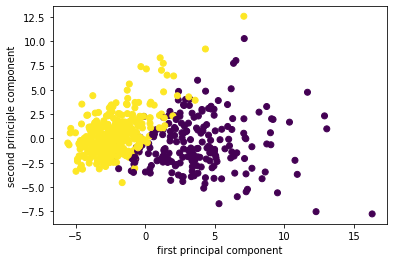

In [24]:
plt.scatter(X_scale_pca[:,0], X_scale_pca[:,1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principle component")
plt.show()

as you can see by just using these 2 principal components, we can classify our problem by just linear models and not using 30 features (just in this dataset).

### LDA

like PCA, Linear Discriminant Analysis (LDA), is a dimensionality reduction technique, but it is supervised and focuses on maximizing the separability among known categories. LDA creates an axis according to two criteria:
   1. Maximizing the distance between class means
   2. minimizing variation within each category<br>

so it tries to separate classes as much as possible and shrink them.<br>
**NOTES**:<br>
   * LDA creates #classes - 1 axis to separate data
   * Like PCA, LDA ranks the axis in order of importance, but instead of using variation in data, it looks for the most variance between the categories.
   * We can use LDA as a classifier because in the end that is what it does, separate our classes.
   * LDA assumes data is guassian.
   * LDA assumes all the classes have the same covariance. if use different covariance for each class then we will have **Quadratic Discriminant Analysis (QDA)** which we can make quadratic desicion boundary with them. compare to LDA they have lower bias and higher variance.
   * Performing LDA before classification as preprocessing step, won't be guaranteed to be useful. it fails when discriminatory information is not in the mean, but in the variance of the data.

#### LDA Psudo Code

1. Separate our dataset according to labels ${D}_{i}$ , shape = (n_samples with class i, n_features)
2. Calculate means of each splitted dataset  $\mu_{i}$ , shape = (1, n_features)
3. Calculate between class scatter<br>
    ${B} = (\mu_{1} - \mu_{2})(\mu_{1} - \mu_{2})^{T}$  for binary classification and shape = (n_features, n_features)<br> 
4. Center class matrices<br>
    ${Z}_{i} = {D}_{i} - \mu_{i}^{T}$ , (n_samples with class i, n_features)<br>
5. Class scatter matrices<br>
    ${S}_{i} = {Z}_{i}^{T} {Z}_{i}$ , shape = (n_features, n_features)<br>
6. Within class scatter matrix
    ${S} = {S}_{1} + {S}_{2}$ , shape = (n_features, n_features)<br>
7. Compute eigenvectors of ${S}^{-1}{B}$ , shape = (n_features, n_features)<br>
8. pick first (#classes - 1) of eigenvectors and project your original dataset on them.

#### Implementing in Scikit Learn

In [25]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [26]:
X,y = load_breast_cancer(return_X_y=True)
scale = StandardScaler()
X = scale.fit_transform(X)
LDA = LinearDiscriminantAnalysis(solver='svd',store_covariance=True)
LDA.fit(X,y)
X_LDA = LDA.transform(X)
X.shape,X_LDA.shape

((569, 30), (569, 1))

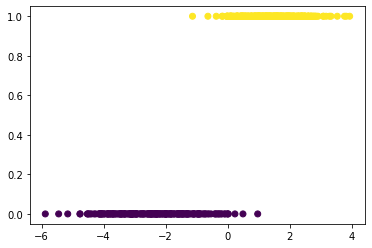

In [27]:
plt.scatter(X_LDA, y, c=y)

**NOTE**: LDA is probabilistic model, so we will talk about them, in probabilistic models chapter, so if you want to learn more check them too.